In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = r"C:\Users\lenovo\Desktop\Phnumonia Model\chest_xray\train"
test_dir = r"C:\Users\lenovo\Desktop\Phnumonia Model\chest_xray\test"
val_dir = r"C:\Users\lenovo\Desktop\Phnumonia Model\chest_xray\val"

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\lenovo\Desktop\Phnumonia Model\chest_xray\train',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    r'C:\Users\lenovo\Desktop\Phnumonia Model\chest_xray\val',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\lenovo\Desktop\Phnumonia Model\chest_xray\test',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=20
)


C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.8108 - loss: 0.4227 - val_accuracy: 0.8125 - val_loss: 0.5996
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 924ms/step - accuracy: 0.8957 - loss: 0.2628 - val_accuracy: 0.8125 - val_loss: 0.6812
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 882ms/step - accuracy: 0.9038 - loss: 0.2428 - val_accuracy: 0.8125 - val_loss: 0.4149
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 938ms/step - accuracy: 0.9137 - loss: 0.2176 - val_accuracy: 0.7500 - val_loss: 0.6475
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 894ms/step - accuracy: 0.9258 - loss: 0.1893 - val_accuracy: 0.7500 - val_loss: 0.7511
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 796ms/step - accuracy: 0.9319 - loss: 0.1786 - val_accuracy: 0.6875 - val_loss: 0.8985
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 674ms/step - accuracy: 0.9392 - loss: 0.1693 - val_accuracy: 0.8125 - val_loss: 0.5184
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 660ms/step - accuracy: 0.9392 - lo

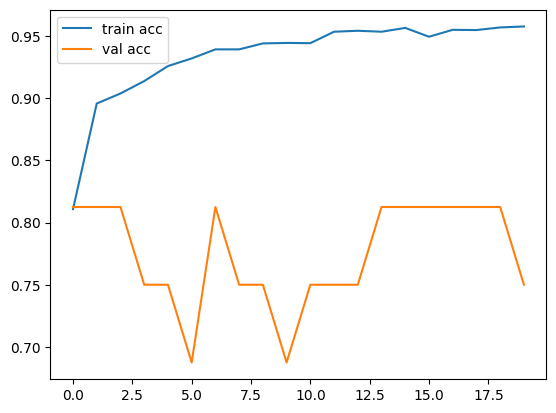

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 642ms/step - accuracy: 0.8141 - loss: 0.5956
Test Accuracy: 81.41%


In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate on test data
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")


In [13]:
model.save('pneumonia_model.h5')


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to your unseen X-ray image
img_path = r"D:\Pneumonia Detection Model\IM-0140-0001.jpeg"   # <-- replace with your image file

# Load and preprocess the image (resize same as training: 150x150)
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # (1, 150, 150, 3)
img_array = img_array / 255.0  # normalize

# Prediction
prediction = model.predict(img_array)

# Show image + prediction
plt.imshow(img)
plt.axis("off")
plt.show()

if prediction[0][0] > 0.5:
    print("Predicted: Pneumonia")
else:
    print("Predicted: Normal")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Pneumonia Detection Model\\IM-0140-0001.jpeg'